# Assignment 2 
# FI 8090
## Group 2: Caroline MacMillan, Chris Lee, and Jonghwa Baek

In [1]:
#Packages used in this assignment
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from fredapi import Fred
fred = Fred(api_key='8e5b8f870e07617c9822516d2d0a2769')
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Part 1

#### i.	Download monthly price data of S&P500 and a stock of your choice for the period 01/01/2004 to 12/31/2019 (or any fifteen year period)

In [2]:
assets = ['^GSPC', 'AAPL'] #^GSPC is S&P500, AAPL is Apple, the stock of our choice

data = YahooFinancials(assets).get_historical_price_data(start_date = '2004-01-01', 
                                                         end_date = '2019-12-31', 
                                                         time_interval = 'monthly')
prices_df = pd.DataFrame({a: {x['formatted_date']: x['adjclose'] 
                              for x in data[a]['prices']} for a in assets})

In [3]:
prices_df.head()

,^GSPC,AAPL
2004-01-01,1131.130005,0.348125
2004-02-01,1144.939941,0.369111
2004-03-01,1126.209961,0.417256
2004-04-01,1107.300049,0.397813
2004-05-01,1120.680054,0.432996


#### ii. Compute the monthly returns for the S&P 500 and the stock. Construct one data frame to store the return series. 

In [4]:
omr = (((prices_df/prices_df.shift(1)) - 1) * 100)
monthly_returns = omr.dropna()

In [5]:
monthly_returns.head()

,^GSPC,AAPL
2004-02-01,1.220897,6.028374
2004-03-01,-1.635892,13.043446
2004-04-01,-1.679075,-4.659762
2004-05-01,1.208345,8.844095
2004-06-01,1.798900,15.965792


#### iii.	Construct summary statistics, histogram, correlation matrix of the return series. 

In [6]:
#Regression with True returns
x = monthly_returns['^GSPC']
y = monthly_returns['AAPL']
result = smf.ols(formula = "y ~ x", data = monthly_returns).fit()

In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     67.12
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.76e-14
Time:                        13:56:12   Log-Likelihood:                -672.55
No. Observations:                 191   AIC:                             1349.
Df Residuals:                     189   BIC:                             1356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5064      0.603      4.156      0.000       1.317       3.696
x              1.2529      0.153      8.193      0.000       0.951       1.555
==============================================================================
Omnibus:                        8.327   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               15.991
Skew:                           0.023   Prob(JB):                     0.000337
Kurtosis:                       4.417   Cond. No.                         4.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     67.12
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.76e-14
Time:                        13:56:12   Log-Likelihood:                -672.55
No. Observations:                 191   AIC:                             1349.
Df Residuals:                     189   BIC:                             1356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5064      0.603      4.156      0.0

In [9]:
monthly_returns.describe() #.describe() to see the statistical details.

,^GSPC,AAPL
count,191.000000,191.000000
mean,0.628167,3.293451
std,3.903193,9.552638
min,-16.942452,-32.955791
25%,-1.529683,-2.050540
50%,1.157625,4.093452
75%,2.985078,9.322231
max,10.772304,35.225802


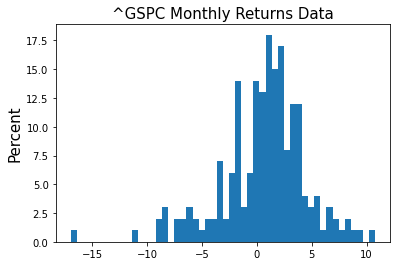

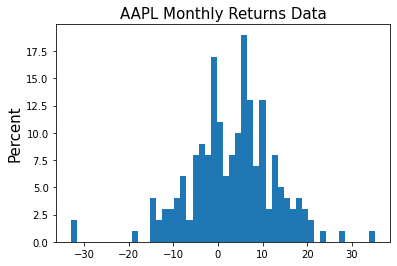

In [10]:
def indhist(stock, indTitle): #Function for ease of plotting monthly returns individually
    monthly_returns[stock].plot.hist(bins = 50)
    plt.ylabel("Percent", fontsize = 15)
    plt.title(indTitle, fontsize = 15)
    plt.show()
    
for a in assets: #For loop to plot both individual stocks' plots at once
    indhist(a, a + ' Monthly Returns Data')

In [11]:
monthly_returns.corr()  #correlation matrix of the monthly returns series

,^GSPC,AAPL
^GSPC,1.000000,0.511927
AAPL,0.511927,1.000000


#### iv.	Download 3 month TBill rate from Fred. Consider the TBill data  for the same sample period 01/01/2004 to 12/31/2019 (or any fifteen year period that you have chosen) . 

In [12]:
#Downloading the Data and converting the Data into a DataFrame
TBill = pd.DataFrame(fred.get_series('TB3MS', 
                                     observation_start = '2004-01-01', 
                                     observation_end = '2019-12-31'), columns = ['TBill'])

In [13]:
amTBill = TBill/12
amTBill.head()

,TBill
2004-01-01,0.073333
2004-02-01,0.077500
2004-03-01,0.078333
2004-04-01,0.078333
2004-05-01,0.085000


In [14]:
# gmTBill = (((1 + TBill)**(1/12)) - 1 )
# gmTBill.head()

#### v.	Construct a matrix of return series combining Stock, S&P500, and TBill for the sample period. 

In [15]:
#Concatenating the two dataframes
monthly_returns2 = pd.concat([omr, amTBill], axis = 1).dropna()data2014.head()

In [16]:
monthly_returns2.head()

,^GSPC,AAPL,TBill
2004-02-01,1.220897,6.028374,0.077500
2004-03-01,-1.635892,13.043446,0.078333
2004-04-01,-1.679075,-4.659762,0.078333
2004-05-01,1.208345,8.844095,0.085000
2004-06-01,1.798900,15.965792,0.105833


#### vi.	Find Beta for the stock based on the sample data using CAPM model. 

##### <center> CAPM: Stock Return = Risk Free Return + $\beta$(Market Return - Risk Free Return)
#### <center> Regress Return of Stock agasint Return of Market where $\beta$ is the slope of the regression.

In [17]:
monthly_returns2['market_excess'] = monthly_returns2['^GSPC'] - monthly_returns2['TBill'] #Market Risk Premium
monthly_returns2['stock_excess'] = monthly_returns2['AAPL'] - monthly_returns2['TBill'] #Risk Premium of Apple

In [18]:
monthly_returns2.head()

,^GSPC,AAPL,TBill,market_excess,stock_excess
2004-02-01,1.220897,6.028374,0.077500,1.143397,5.950874
2004-03-01,-1.635892,13.043446,0.078333,-1.714225,12.965113
2004-04-01,-1.679075,-4.659762,0.078333,-1.757409,-4.738095
2004-05-01,1.208345,8.844095,0.085000,1.123345,8.759095
2004-06-01,1.798900,15.965792,0.105833,1.693067,15.859959


In [19]:
result = smf.ols(formula = 'stock_excess ~ market_excess', data = monthly_returns2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stock_excess   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     66.31
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.09e-14
Time:                        13:56:13   Log-Likelihood:                -672.64
No. Observations:                 191   AIC:                             1349.
Df Residuals:                     189   BIC:                             1356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5384      0.601      4.224      0.000       1.353       3.724
market_excess     1.2441      0.153      8.143      0.000       0.943       1.545
==============================================================================
Omnibus:                        8.348   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               16.054
Skew:                           0.024   Prob(JB):                     0.000327
Kurtosis:                       4.419   Cond. No.                         3.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
beta1 = result.params['market_excess']
beta1

1.2440628358290535

#### vii. Test the null hypothesis: $H_{0}: \beta_{1} = 0$ ; what do you conclude? Draw your conclusion based on p-value.  

Null Hypothesis, $H_{0}$: the mean is equal to zero. Alternative Hypothesis, $H_{A}$: the mean is not equal to zero. Since the p-value that we got is 0, we reject the Null Hypothesis, concluding that the move of Apple's return is sensitive to the move of the market return, S&P 500 in this example.

#### viii. Estimate $\beta_{1}$  numerically (based on covariance of the stock return with market return and variance of market return) using the sample period data. Obtain beta of the stock from available stock report (refer the financial website that you choose).  Discuss why these three measures are same or different.

### <center> $\beta = \frac{\text{cov}(R_{i},R_{m})}{\sigma^{2}_{m}}$



In [21]:
# #Covariance matrix with normalized data and extracting the covariance coefficient
# cov = np.cov(monthly_returns2['stock_excess'], monthly_returns2['market_excess'], bias = True)[0][1] 
# variance_market = monthly_returns2['market_excess'].var()
# beta2 = cov/variance_market
# print("The Beta is:", beta2)

In [22]:
#Beta Using True returns
x = monthly_returns2['^GSPC']
y = monthly_returns2['AAPL']
#Covariance matrix with normalized data and extracting the covariance coefficient
cov = np.cov(x, y, bias = True)[0][1]
variance_market = x.var()
beta2 = cov/variance_market
print("The Beta is:", beta2)

The Beta is: 1.2463250992889987


In [23]:
print("The Beta from CAPM model is:", beta1)
print("The Beta from calculating numerically is:", beta2)
print("The Beta from Yahoo Finance is: 1.31")

The Beta from CAPM model is: 1.2440628358290535
The Beta from calculating numerically is: 1.2463250992889987
The Beta from Yahoo Finance is: 1.31


Betas from the first two measures are not significantly different from each other, since all measures are explaining the same concept, which is how sensitive the stock return is in response to the market return. However, the beta from yahoo finance shows higher value than the other measures. Besides the different time period(5Y) yahoo finance beta is based on, it is assumed that the investors have been highly speculative on the Apple's stock especially over the last 5 years, which may drive higher beta. Speculation refers to conducting financial transaction with expection of significant gain while taking substantial risks of losing value, and it often takes places when the market trend is favorable. While overall stock market has been upward trend with higher growth for the the same period, Apple, one of the most active stocks in the market may have been able to outperform the market, which may be explained by speculative investment associated with high liquidity. Overall, Apple's stock has been more volatile and sensitive relative to the market for the past 5 years, resulting in higher beta than the other measures based on longer term period data.

*Beta from Yahoo Finance: 1.31  (Source: https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch)*

#### ix.	Provide interpretation of the coefficient estimate $\beta_{1}$    . 	

- Apple's stock has a positive relationship with the market returns
- The coefficient estimate here, 1.2529, means that every 1 unit of movement in the market return explains 1.2529 unit of movement in the stock return. In other words, if market returns increase(decrease) by 1%, the Apple's stock returns increase(decrease) by 1.2529%. This is indeed the definition of beta.

#### x.	Comment on model accuracy: standard error and R-square.

Regression results show relatively high standard errors for both intercept and coefficient, 2.5064 and 1.2529 respectively while having R-square 26%, implying low explanatory power. Apple's stock is a component of S&P 500, so by definition of beta, the S&P500 trend may account for some of the Apple's return, however, S&P alone may not be sufficient to explain all of the stock return. Thus, it is reasonably assumed that there may be other factors that have significant impacts on the Apple's return; including macroeconomic indicators like GDP growth or unemployment rates or company specific factors like sales performance of the existing & new lines(i.e. iPhone, Apple Watch, or Airpods).  It may be recommened to add additional independent variables and to test how they have effects on the dependent for more accurante and thorough analysis. By adding them, we may expect high explanatory power with relatively low errors from the new model.

#### xi. Provide the scatter plot and the fitted line for the linear regression model.   

In [24]:
#Regression with True returns
x = monthly_returns2['^GSPC']
y = monthly_returns2['AAPL']
result = smf.ols(formula = "y ~ x", data = monthly_returns).fit()

In [25]:
result.params

Intercept    2.506430
x            1.252885
dtype: float64

In [26]:
ypred = result.params[1]*x + result.params[0]

In [27]:
#Alternative method
# ypred = LinearRegression().fit(x_reshaped, y_reshaped).predict(x_reshaped)
# print(LinearRegression().fit(x_reshaped, y_reshaped).intercept_)
# print(LinearRegression().fit(x_reshaped, y_reshaped).coef_)

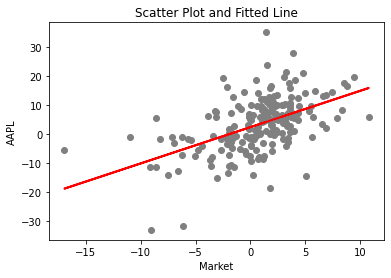

In [28]:
plt.scatter(x, y,  color = 'gray')
plt.plot(x, ypred, color = 'red', linewidth = 2)
plt.title("Scatter Plot and Fitted Line")
plt.xlabel("Market")
plt.ylabel("AAPL")
plt.show()

#### xii. Discuss $\alpha$ as estimated by the fitted model.	

In [29]:
(alpha, beta) = result.params[0:2]
print("The alpha is:", alpha)
print("The beta is:", beta)

The alpha is: 2.5064299237044514
The beta is: 1.2528847050747298


Alpha is same as an intercept in the single resgression model. The alpha is the average stock return earned regardless of extra return associated with beta.

### Part 2

In [30]:
data = pd.read_csv('credit.csv')

#### A. Perform the following steps.

#### i.	Observe the dimension of the Credit data.

In [31]:
data.head() #Head of the Credit Data

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [32]:
data.shape #Dimension of the Credit Data

(400, 12)

In [33]:
credit = data.drop(columns=['Unnamed: 0']) #Dropped the first column, 'Unnamed: 0'.
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [34]:
credit.isnull().any() #Checking if there are any null values in the data to clean

Income       False
Limit        False
Rating       False
Cards        False
Age          False
Education    False
Gender       False
Student      False
Married      False
Ethnicity    False
Balance      False
dtype: bool

In [35]:
print("Credit data dimension: ", credit.shape) #Dimension of the new data
print("Credit data size: ", credit.size) #Size of the new data

Credit data dimension:  (400, 11)
Credit data size:  4400


#### ii. Provide a summary stat for the variables in Credit data.

In [36]:
result = smf.ols(formula = 'Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = credit).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.11e-253
Time:                        13:56:13   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479

Since the P-values of Gender, Marital Status, Ethnicity, and Education are greater than 0.1 we can conclude that these variables are not significantly different from zero. We conclude that these factors do not have a significant effect on credit card balance. Since the P-Values of Student, Income, Limit, Cards, and Age are less than 0.05, we can conclude that these variables are statistically significant from zero and have an effect on credit card balance.

#### iii. What is the percentage of Student in the Credit data? What is the percentage of Female in the Credit data? What is the percentage of Student who are Female in the Credit data?

In [37]:
scount = (credit['Student'] == 'Yes').sum() / len(credit['Student'])*100             
fcount = (credit['Gender'] == 'Female').sum()          
sfcount = 0
for i in range(len(credit[['Student', 'Gender']])):
    if (credit[['Student','Gender']].iloc[i,0] == 'Yes') and (credit[['Student','Gender']].iloc[i,1] == 'Female'):
        sfcount += 1
        
print(str('{0:.2f}'.format(scount)) + '% is the percentage of Students in the Credit Data.')
print(str(round((fcount / len(credit['Gender']))*100, 2)) + '% is the percentage of Females in the Credit Data.')
print(str('{0:.2f}'.format(sfcount / (credit['Student'] == 'Yes').sum()*100)) + '% is the percentage of Students who are Female.')
print(str('{0:.2f}'.format(sfcount / len(credit['Gender'])*100)) + '% is the percentage of Female Students in the entire Credit Data.')

10.00% is the percentage of Students in the Credit Data.
51.75% is the percentage of Females in the Credit Data.
60.00% is the percentage of Students who are Female.
6.00% is the percentage of Female Students in the entire Credit Data.


In [38]:
#Alternative Solution
# scount = 0
# for i in credit['Student']:
#     if i == 'Yes':
#         scount += 1
# fcount = 0
# for i in credit['Gender']:
#     if i == 'Female':
#         fcount += 1   

#### B.	Construct a linear regression model to test the following:

#### i. Test how Credit Rating and Student effect Credit Card Balance. In the same model, also test whether the effect of Credit Rating on Credit Card Balance is different for students vs. non-students.

In [39]:
student_dummy = pd.get_dummies(credit['Student'])
student_dummy.columns = ['Non_Student_Dummy', 'Student_Dummy']
gender_dummy = pd.get_dummies(credit['Gender'])
dummied = pd.concat([credit,student_dummy, gender_dummy], axis=1)
dummied.head()    

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Non_Student_Dummy,Student_Dummy,Male,Female
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,1,0


In [40]:
CCB = smf.ols(formula = 'Balance ~ Rating + Student_Dummy + Rating * Student_Dummy', data = dummied).fit()    
print(CCB.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     579.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          2.13e-144
Time:                        13:56:13   Log-Likelihood:                -2682.5
No. Observations:                 400   AIC:                             5373.
Df Residuals:                     396   BIC:                             5389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -423.3712 

#### ii. Provide a summary of the model. 

- Since the p-value of both Rating and Student are close to zero and t statistics are higher than the threshold, it is reasonably assumed that both variables are significantly different from zero. Hence, it is concluded that Rating and Student have significant effect on the credit balance.
 
- Average credit card balance is -111.3718 for students and -423.3712 for non-students. Average students are likely to have around 311.9994 higher credit balance than non-students and the difference is statistically significant(p-value=0.000).

- Effect of rating is as follows; 2.7915 for students and 2.5454 for non students. The difference is not statistically significant given high p-value (0.272). Thus, Credit Rating on Credit Card Balance is not different between students and non-students.

### Part 3

#### i.	Test whether Age influence Credit Card Balance on the basis of simple linear regression.(Provide a summary of the model). 


In [41]:
result = smf.ols(formula = 'Balance ~ Age', data = credit).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001340
Date:                Wed, 14 Oct 2020   Prob (F-statistic):              0.971
Time:                        13:56:13   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.2922     77.852      6.645      0.0

The simple linear regression of Credit Card Balance on Age returns a $\beta_{1}$ coefficient of 0.0489, meaning for every increase of 1 year, credit card balance will increase by 0.0489. However, the p-value of Age is 0.971, which is very high, meaning that we fail to reject the null hypothesis. We conclude that Age does not have a significant impact on Credit Card Balance in this simple linear regression.

#### ii.	Use Age and Credit Rating as predictors of Credit Card Balance (response variable) in a multiple linear regression setting. (Provide a summary of the model).   

In [42]:
result = smf.ols(formula = 'Balance ~ Age + Rating', data = credit).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     606.9
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.82e-121
Time:                        13:56:13   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5484.
Df Residuals:                     397   BIC:                             5496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -269.5811     44.806     -6.017      0.0

In this multiple linear regression the coefficents for Age and Rating are -2.3508 and 2.5933, respectively. This implies that for every 1 year increase in age, all else equal, credit card balance will decrease by 2.3508. And for every 1 unit increase in credit rating, all else equal, credit card balance will increase by 2.5933. Note that because the p-values of both Age and Rating are close to zero, we reject the null hypothesis and conclude that in this multiple linear regression, both Age and Rating have a significant impact on credit card balance.

#### iii.	Compare effect of Age from part (i) and (ii): Write the explanation for part (iii) in Python code.

- From part (i): The simple linear regression of Credit Card Balance on Age returns a $\beta_{1}$ coefficient of 0.0489, meaning for every increase of 1 year of age, credit card balance will increase by \\$0.0489. However, the p-value of Age is 0.971, which is very high, meaning that we fail to reject the null hypothesis. We conclude that Age does not have a significant impact on Credit Card Balance in this simple linear regression.

- From part (ii): The multiple linear regression the coefficents for Age and Rating are -2.3508 and 2.5933, respectively. This implies that for every 1 year increase in age, all else equal, credit card balance will decrease by \\$2.3508. And for every 1 unit increase in credit rating, all else equal, credit card balance will increase by \\$2.5933. Note that because the p-values of both Age and Rating are close to zero, we reject the null hypothesis and conclude that in this multiple linear regression, both Age and Rating have a significant impact on credit card balance.

- From both part (i) and (ii), age has different impact on the credit card balance, one if positive and one is negative. While the effect of Age was not statistically significant in simple linear regression (p-value = 0.971, which is very high), it was significant in multiple linear regression (p-value = 0). This means that when considering the impact of Age alone on Credit Card Balance, Age is not significant, but in the multiple linear regression, when you can consider Age while holding Credit Rating the same, Age does have a significant effact on Credit Card Balance. The multiple linear regression model with Age and Rating is a better fit than the simple linear regression. 

#### iv.	Observe the distribution of Age. Construct 3 dummy variables based on Age distribution: 
#### <center> 1. Age 40 and below (Age $\leq $40)
#### <center> 2. Age Between 41 to 56 (41 $\leq$ Age $\leq$ 56)
#### <center>  3. Age group over 56 (Age > 56)

#### Construct model to observe whether credit card balance is significantly different for different age group. Consider the age group over 56 as the baseline. 


In [43]:
age_40_and_below = []
age_bet_41_to_56 = []
age_over_56 = []

for element in credit['Age']:
    if element <= 40:
        age_40_and_below.append(1)
        age_bet_41_to_56.append(0)
        age_over_56.append(0)
    elif (element >= 41 and element <= 56):
        age_40_and_below.append(0)
        age_bet_41_to_56.append(1)
        age_over_56.append(0)
    elif element > 56:
        age_40_and_below.append(0)
        age_bet_41_to_56.append(0)
        age_over_56.append(1)

In [44]:
age_dummies = pd.DataFrame(list(zip(age_40_and_below, 
                                    age_bet_41_to_56, 
                                    age_over_56)), 
                           columns = ['age_40_and_below', 
                                      'age_bet_41_and_56', 
                                      'age_over_56'])
age_dummies.head()

,age_40_and_below,age_bet_41_and_56,age_over_56
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


In [45]:
Credit_with_AD = pd.concat([credit, age_dummies], axis= 1)
Credit_with_AD.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,age_40_and_below,age_bet_41_and_56,age_over_56
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1


In [46]:
result = smf.ols(formula = 'Balance ~ age_40_and_below + age_bet_41_to_56', data = Credit_with_AD).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.557
Date:                Wed, 14 Oct 2020   Prob (F-statistic):             0.0294
Time:                        13:56:14   Log-Likelihood:                -3015.8
No. Observations:                 400   AIC:                             6038.
Df Residuals:                     397   BIC:                             6050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          483.0825     32.799  

- For our regression, we excluded the Age group over 56 as it is going to be our base line. 
- With $\beta_{0}$ = 483.0825, representing the average credit card balance for our base line, the age group over 56, being significant.
- With $\beta_{1}$ having a really high p-value of 0.925 which implies that there is no significant difference in credit card balance between the Age group over 56 and the Age group below 40.
- With $\beta_{2}$ = 132.7871 has a p-value of 0.014 which is less than 0.05, implies that the Age group between 41 to 56 has significantly $132.79 higher credit card balance on average as compared to the Age group over 56.